In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
df = pd.read_csv("../data/processed/train_processed.csv")

X = df.drop(columns=["log_price"])
y = df["log_price"]

In [5]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = lin_reg.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print("Linear Regression RMSE:", rmse)
print("Linear Regression R²:", r2)


Linear Regression RMSE: 0.25225048335999917
Linear Regression R²: 0.7694167231751405


In [8]:
coef_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": lin_reg.coef_
}).sort_values(by="coefficient", ascending=False)

coef_df


,feature,coefficient
8,grade,0.204030
9,lat,0.188271
2,sqft_living_capped,0.168476
11,house_age,0.104697
1,bathrooms,0.058297
6,view,0.054259
7,condition,0.036522
5,waterfront,0.031931
4,floors,0.029403
10,long,0.008281


In [9]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
y_pred = rf.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
rmse_rf = np.sqrt(mse)
r2_rf = r2_score(y_val, y_pred)

print("Random Forest RMSE:", rmse_rf)
print("Random Forest R²:", r2_rf)


Random Forest RMSE: 0.17934290298025815
Random Forest R²: 0.8834446579919888


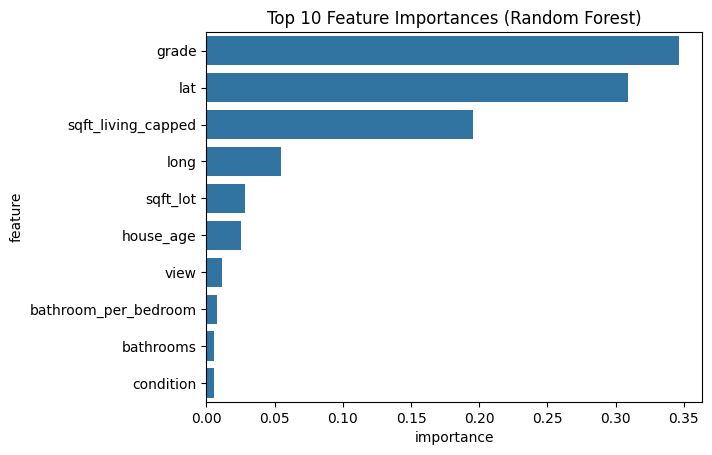

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
}).sort_values(by="importance", ascending=False)

sns.barplot(
    x="importance",
    y="feature",
    data=importances.head(10)
)
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

gbr.fit(X_train, y_train)


In [13]:
y_pred = gbr.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
gbr_rmse = np.sqrt(mse)
gbr_r2 = r2_score(y_val, y_pred)

print("Random Forest RMSE:", gbr_rmse)
print("Random Forest R²:", gbr_r2)


Random Forest RMSE: 0.17217665899992385
Random Forest R²: 0.8925732727772764


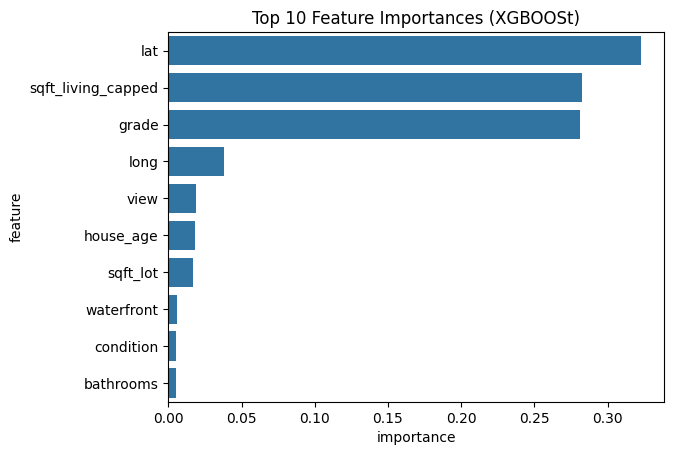

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = pd.DataFrame({
    "feature": X.columns,
    "importance": gbr.feature_importances_
}).sort_values(by="importance", ascending=False)

sns.barplot(
    x="importance",
    y="feature",
    data=importances.head(10)
)
plt.title("Top 10 Feature Importances (XGBOOSt)")
plt.show()


In [15]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest","XGBOOST"],
    "RMSE": [rmse, rmse_rf,gbr_rmse],
    "R2": [r2, r2_rf,gbr_r2]
})

results


,Model,RMSE,R2
0,Linear Regression,0.252250,0.769417
1,Random Forest,0.179343,0.883445
2,XGBOOST,0.172177,0.892573


In [19]:
df["lat"].describe()

count    1.620900e+04
mean    -6.679777e-15
std      1.000031e+00
min     -2.901692e+00
25%     -6.376282e-01
50%      8.452999e-02
75%      8.493381e-01
max      1.567882e+00
Name: lat, dtype: float64